In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from Evaluation.evaluate import *
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
X_train, X_val, y_train, y_val =read_data("../DataFiles/gcn_embeddings/embeddings_all.csv", drop_1st_col=True)

{'CWE121': 4803, 'CWE122': 6550, 'CWE124': 2229, 'CWE126': 1498, 'CWE127': 2223, 'CWE134': 3144, 'CWE190': 4325, 'CWE191': 3185, 'CWE194': 1232, 'CWE195': 1262, 'CWE23': 2653, 'CWE36': 2627, 'CWE401': 1814, 'CWE457': 739, 'CWE590': 2875, 'CWE690': 1062, 'CWE762': 4115, 'CWE78': 5351}


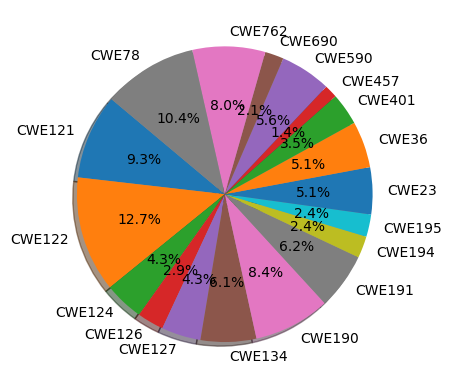

In [4]:
show_proportions(y_train)
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [22]:
clf=LogisticRegression(random_state=0 )
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val, clf.predict(X_train), y_train)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accurracy: 75.90303171010119%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1137
      CWE122       0.69      0.78      0.73      1631
      CWE124       0.47      0.39      0.42       559
      CWE126       0.75      0.57      0.65       451
      CWE127       0.45      0.47      0.46       555
      CWE134       0.96      0.98      0.97       801
      CWE190       0.55      0.78      0.64      1005
      CWE191       0.51      0.26      0.35       828
      CWE194       0.79      0.63      0.70       360
      CWE195       0.68      0.82      0.74       330
       CWE23       0.71      0.71      0.71       660
       CWE36       0.73      0.68      0.71       687
      CWE401       0.73      0.79      0.76       447
      CWE457       0.82      0.76      0.79       175
      CWE590       0.69      0.63      0.66       713
      CWE690       0.95      0.94      0.94       264
      CWE762       0.95      0.96      0.9

In [6]:
# save the model
save_model(clf, "LR_model_all")

## Test Safe group1
    - 78 , 121, 122, 190

In [7]:

path = "../DataFiles/gcn_embeddings/group1/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_121.csv', 'concatEmbeddings_122.csv', 'concatEmbeddings_190.csv', 'concatEmbeddings_78.csv']


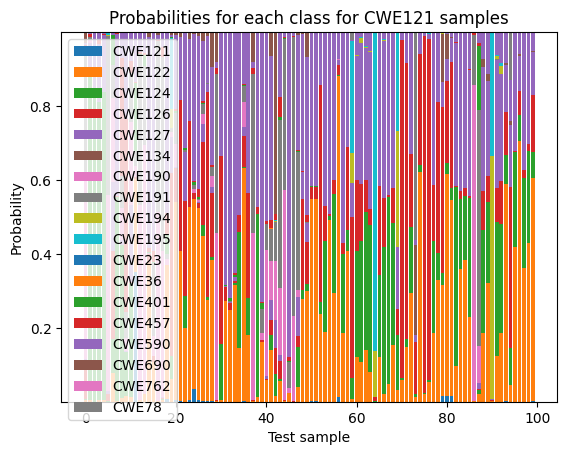

In [8]:
show_probs(all_probabilities[0], clf,"CWE121")

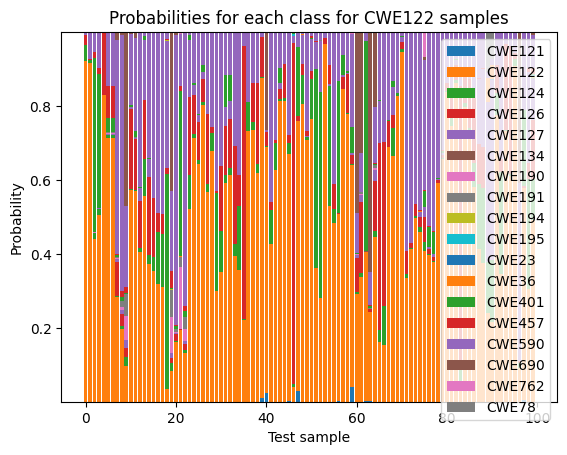

In [10]:
show_probs(all_probabilities[1], clf,"CWE122")

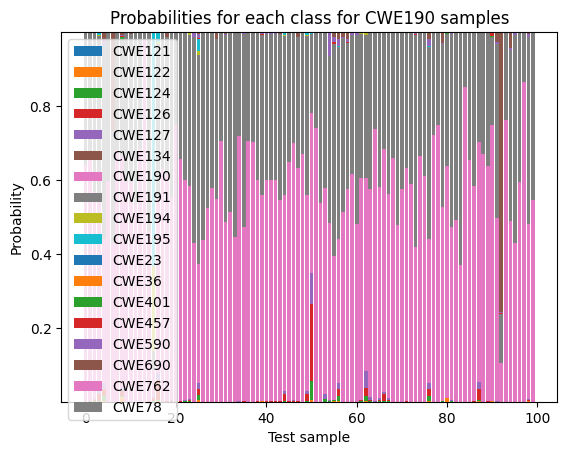

In [11]:
show_probs(all_probabilities[2], clf,"CWE190")

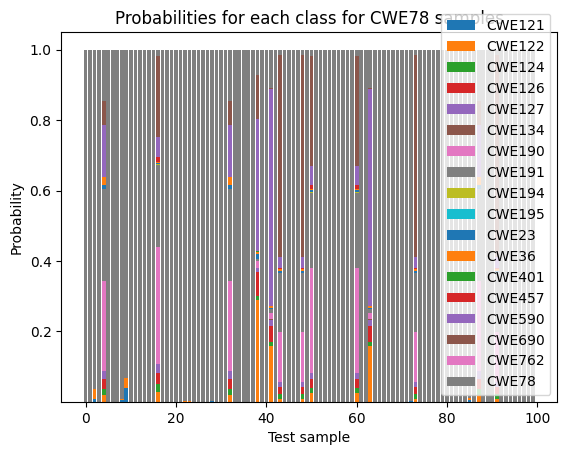

In [12]:
show_probs(all_probabilities[3], clf,"CWE78")

## Test Safe group2
    - 762, 191, 134, 590

## Test Safe group3
    - 23, 194, 124, 401, 690

In [15]:

path = "../DataFiles/gcn_embeddings/group3/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_124.csv', 'concatEmbeddings_194.csv', 'concatEmbeddings_23.csv', 'concatEmbeddings_401.csv', 'concatEmbeddings_690.csv']


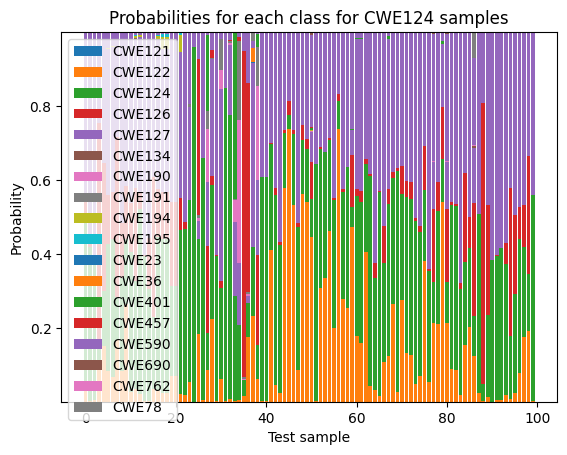

In [17]:
show_probs(all_probabilities[0], clf,"CWE124")

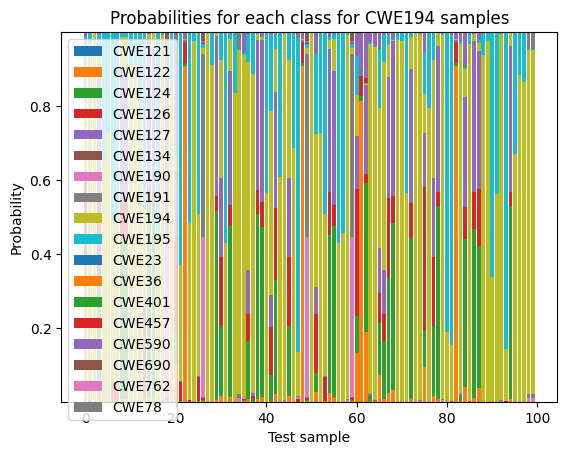

In [18]:
show_probs(all_probabilities[1], clf,"CWE194")

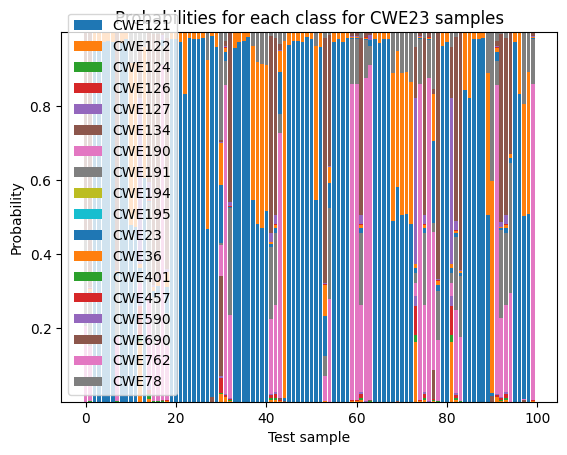

In [19]:
show_probs(all_probabilities[2], clf,"CWE23")

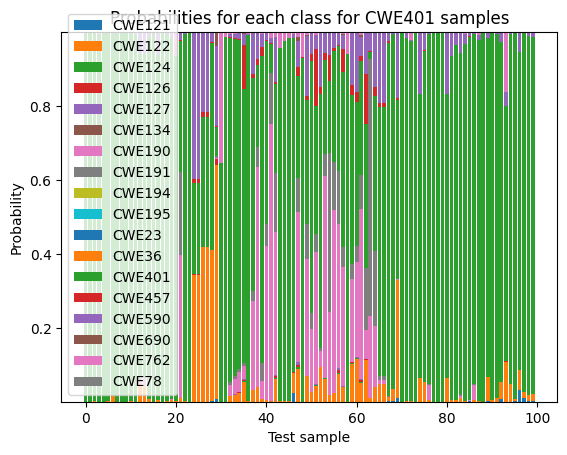

In [20]:
show_probs(all_probabilities[3], clf,"CWE401")

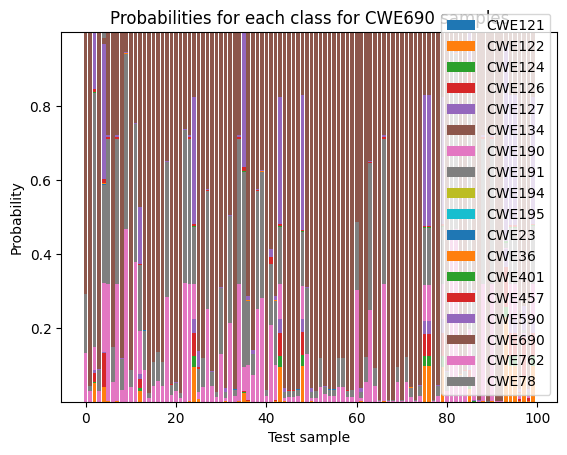

In [21]:
show_probs(all_probabilities[4], clf,"CWE690")

## Test Safe group4
    - 36, 126, 127, 195, 457

In [24]:
path = "../DataFiles/gcn_embeddings/group4/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_126.csv', 'concatEmbeddings_127.csv', 'concatEmbeddings_195.csv', 'concatEmbeddings_36.csv', 'concatEmbeddings_457.csv']


C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


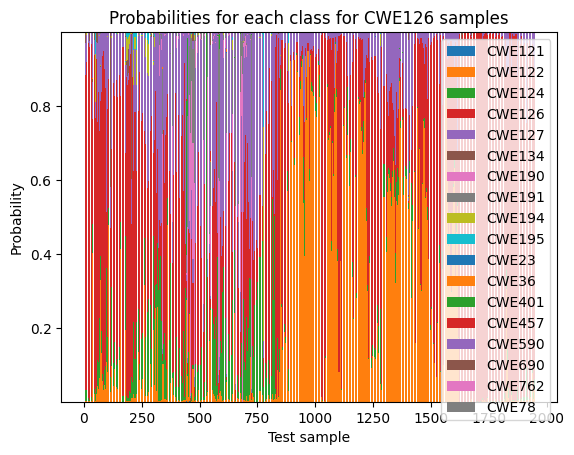

In [25]:
show_probs(all_probabilities[0], clf,"CWE126")

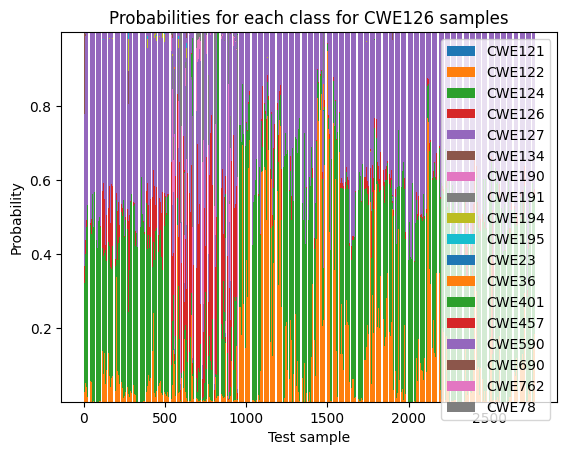

In [26]:
show_probs(all_probabilities[1], clf,"CWE126")

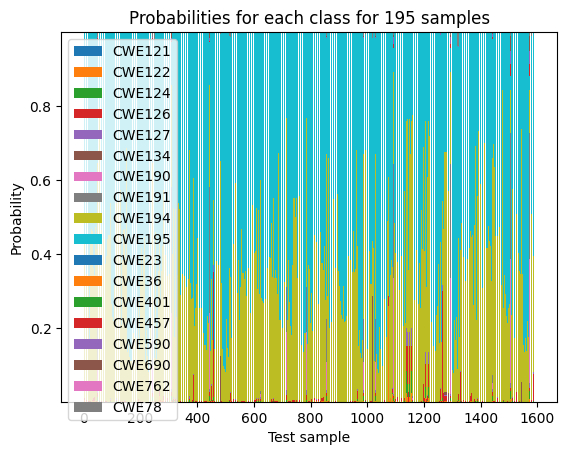

In [27]:
show_probs(all_probabilities[2], clf,"195")

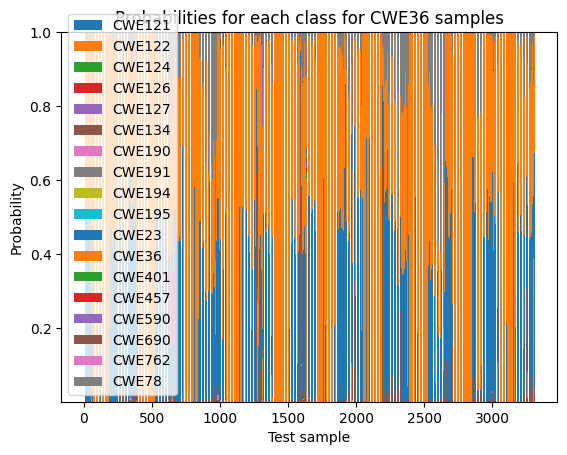

In [28]:
show_probs(all_probabilities[3], clf,"CWE36")

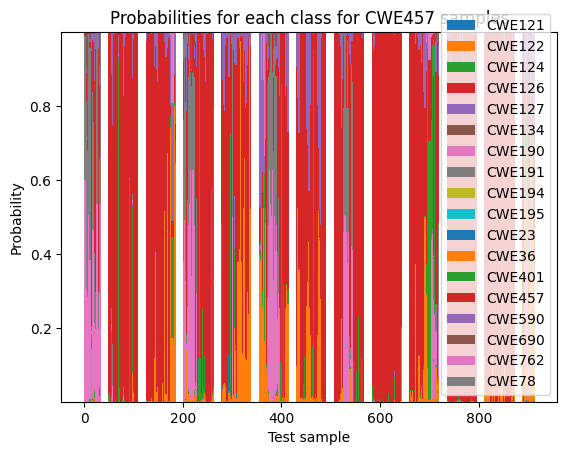

In [29]:
show_probs(all_probabilities[4], clf,"CWE457")